# K-Nearest Neighbors

## In this notebook, I will use a real dataset to perform K-Nearest Neighbors.

### First, we need to load necessary libraries and the dataset.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
df=pd.read_csv('loan_data.csv')

#### After having the dataset, we need to check the dataset's shape and deal with missing values. This is important to perform the algorithm later.

In [2]:
df.shape

(9578, 14)

In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### According to the description, 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid' and 'credit.policy' are categorized variables. Besides, 'not.fully.paid' is the variable we want to predict. The 'purpose' is string, we will just leave out this variable.

####  Then, check for the missing values.

In [8]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### There are not missing values in this dataset. It is clean. Then, let's do some data visualization.

Text(0.5, 0, 'FICO')

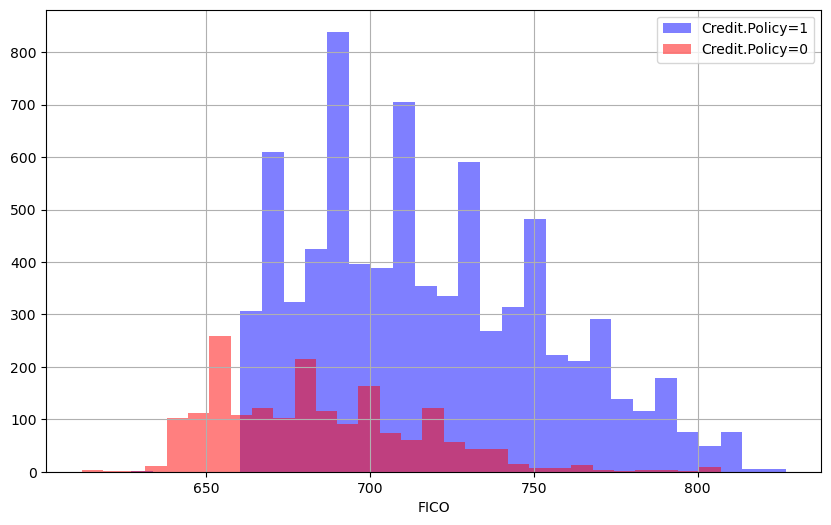

In [10]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

#### This plot shows the histgram between 'FICO' (The FICO credit score of the borrower) and 'credit_policy'(1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.)

In [25]:
y = df['not.fully.paid']
columns_to_drop = ['not.fully.paid','purpose']
X = df.drop(columns=columns_to_drop)
y=y.to_numpy()
X=X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [26]:

def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [27]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [28]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([1.00000000e+00, 1.14800000e-01, 1.81330000e+02, 9.57498349e+00,
         1.20800000e+01, 7.07000000e+02, 3.28000000e+03, 5.28200000e+03,
         3.00000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  0,
  123.89214987944455],
 [array([1.00000000e+00, 9.32000000e-02, 1.27790000e+02, 1.09150885e+01,
         6.76000000e+00, 7.37000000e+02, 3.33004167e+03, 5.28700000e+03,
         1.84000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  0,
  131.6306054121893],
 [array([1.00000000e+00, 1.25300000e-01, 6.69400000e+01, 1.05966347e+01,
         1.92000000e+01, 6.97000000e+02, 3.27000000e+03, 5.39600000e+03,
         8.99000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  0,
  163.655994088507],
 [array([1.00000000e+00, 1.41100000e-01, 2.05380000e+02, 1.05966347e+01,
         1.96700000e+01, 6.67000000e+02, 3.24000000e+03, 5.15500000e+03,
         5.66000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  1,
  180.0407128494481],
 [array(

In [30]:
y_test[-1]

0

#### We have defined the KNN rules based on our training dataset, then we can do the prediction.

In [31]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

#### Above codes define both classification and regression. Becasue our predict variable is binary, so it uses classsfication.

In [32]:
KNN_Predict(X_test[200], X_train, y_train, 5)

0

#### After making sure our function works, we need to evaluate the classification error.

In [33]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [34]:
classification_error(X_test, y_test, X_train, y_train, 7)

0.16805845511482254

#### The result shows the error of calssification is about 17%. It is a little large error rate. 